### Team 3 Authors: Joshua Levy, Ryan Killea, Muralidhar Koripalli, Kartik Nautiyal
Note that this notebook is a combination of each of our works done mostly separately due to Thanksgiving break and the quick turnaround. When we came together at the end of the project we found that some of us were running different versions of the libraries, leading to our results only exactly reproducing on the versions on which they were created (reliably, and confirmed by rerunning the exact same code on different computers).

### Data Processing

In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pathlib
import mapclassify as mc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.utils import resample
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn import tree
import graphviz
import pydot
import shapefile
df = pd.read_excel("CompiledData502_2.xlsx")
df.head()

,City Name,Percent Cases Total,Percent Cases Last 14 Days,Population,Median annual household income,2019 Bond Rating,Residential Tax Rating,Open Space Tax Rating,Commercial Tax Rating,Industrial Tax Rating,...,Commercial Levy,Industrial Levy,Personal Property Levy,Labor Force,Employed,Unemployed,EQV Per Capita,Total Revenues,Meals Tax Rate,Marijuana Tax Rate
0,Abington,0.015283,0.000370,16227,91643,NaN,17.39,0.0,17.39,17.39,...,3345457.47,327005.04,750914.11,9393,9107,286,116629,26460426421,0.0075,0.03
1,Acton,0.007389,0.000042,23549,133713,Aaa,19.37,0.0,19.37,19.37,...,6305363.19,1775940.39,1486652.19,13038,12776,262,182870,51330190,0.0075,NaN
2,Acushnet,0.009831,0.000095,10477,69402,NaN,14.18,0.0,18.20,18.20,...,591499.22,446970.52,1035493.59,6331,6111,220,105534,93740261,NaN,NaN
3,Adams,0.004275,0.000000,8187,49777,NaN,21.39,0.0,25.40,25.40,...,874478.44,737392.18,655712.86,4126,3959,167,60722,28604740,0.0075,0.03
4,Agawam,0.017546,0.000659,28839,61919,Aa2,16.65,0.0,31.92,31.92,...,8391324.79,6125764.97,9121915.66,16548,16060,488,102260,16373818,0.0075,NaN


In [2]:
#Dataset contains NaN values. Change them to zeros.
df = df.fillna(0)
df.head()

,City Name,Percent Cases Total,Percent Cases Last 14 Days,Population,Median annual household income,2019 Bond Rating,Residential Tax Rating,Open Space Tax Rating,Commercial Tax Rating,Industrial Tax Rating,...,Commercial Levy,Industrial Levy,Personal Property Levy,Labor Force,Employed,Unemployed,EQV Per Capita,Total Revenues,Meals Tax Rate,Marijuana Tax Rate
0,Abington,0.015283,0.000370,16227,91643,0,17.39,0.0,17.39,17.39,...,3345457.47,327005.04,750914.11,9393,9107,286,116629,26460426421,0.0075,0.03
1,Acton,0.007389,0.000042,23549,133713,Aaa,19.37,0.0,19.37,19.37,...,6305363.19,1775940.39,1486652.19,13038,12776,262,182870,51330190,0.0075,0.00
2,Acushnet,0.009831,0.000095,10477,69402,0,14.18,0.0,18.20,18.20,...,591499.22,446970.52,1035493.59,6331,6111,220,105534,93740261,0.0000,0.00
3,Adams,0.004275,0.000000,8187,49777,0,21.39,0.0,25.40,25.40,...,874478.44,737392.18,655712.86,4126,3959,167,60722,28604740,0.0075,0.03
4,Agawam,0.017546,0.000659,28839,61919,Aa2,16.65,0.0,31.92,31.92,...,8391324.79,6125764.97,9121915.66,16548,16060,488,102260,16373818,0.0075,0.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   City Name                       351 non-null    object 
 1   Percent Cases Total             351 non-null    float64
 2   Percent Cases Last 14 Days      351 non-null    float64
 3   Population                      351 non-null    int64  
 4   Median annual household income  351 non-null    int64  
 5   2019 Bond Rating                351 non-null    object 
 6   Residential Tax Rating          351 non-null    float64
 7   Open Space Tax Rating           351 non-null    float64
 8   Commercial Tax Rating           351 non-null    float64
 9   Industrial Tax Rating           351 non-null    float64
 10  Personal Property Tax Rating    351 non-null    float64
 11  Residential APV                 351 non-null    int64  
 12  Open Space APV                  351 

In [4]:
#City Name and 2019 Bond Rating are strings. To process bond rating need to be numeric.
df['2019 Bond Rating'].unique()

array([0, 'Aaa', 'Aa2', 'Aa1', 'A1', 'Aa3', 'A3', 'A2', 'Baa1'],
      dtype=object)

In [5]:
#Bond ratings are ordinal with best to worst: AAA, AA1, AA2, AA3, A1, A2, A3, BAA1, 0
#Not sure if it makes more sense for zero to be 0 or 9...Changed to 9 for the time being
scale_mapper = {"Aaa":1, "Aa1":2, "Aa2":3, "Aa3":4, "A1":5, "A2":6, "A3":7, "Baa1":8, 0:9}
df["Scaled 2019 Bond Rating"] = df["2019 Bond Rating"].replace(scale_mapper)
df.head()

,City Name,Percent Cases Total,Percent Cases Last 14 Days,Population,Median annual household income,2019 Bond Rating,Residential Tax Rating,Open Space Tax Rating,Commercial Tax Rating,Industrial Tax Rating,...,Industrial Levy,Personal Property Levy,Labor Force,Employed,Unemployed,EQV Per Capita,Total Revenues,Meals Tax Rate,Marijuana Tax Rate,Scaled 2019 Bond Rating
0,Abington,0.015283,0.000370,16227,91643,0,17.39,0.0,17.39,17.39,...,327005.04,750914.11,9393,9107,286,116629,26460426421,0.0075,0.03,9
1,Acton,0.007389,0.000042,23549,133713,Aaa,19.37,0.0,19.37,19.37,...,1775940.39,1486652.19,13038,12776,262,182870,51330190,0.0075,0.00,1
2,Acushnet,0.009831,0.000095,10477,69402,0,14.18,0.0,18.20,18.20,...,446970.52,1035493.59,6331,6111,220,105534,93740261,0.0000,0.00,9
3,Adams,0.004275,0.000000,8187,49777,0,21.39,0.0,25.40,25.40,...,737392.18,655712.86,4126,3959,167,60722,28604740,0.0075,0.03,9
4,Agawam,0.017546,0.000659,28839,61919,Aa2,16.65,0.0,31.92,31.92,...,6125764.97,9121915.66,16548,16060,488,102260,16373818,0.0075,0.00,3


In [6]:
#We don't need the non-numeric column anymore
del df['2019 Bond Rating']

In [7]:
#Check it was done properly
df.head()

,City Name,Percent Cases Total,Percent Cases Last 14 Days,Population,Median annual household income,Residential Tax Rating,Open Space Tax Rating,Commercial Tax Rating,Industrial Tax Rating,Personal Property Tax Rating,...,Industrial Levy,Personal Property Levy,Labor Force,Employed,Unemployed,EQV Per Capita,Total Revenues,Meals Tax Rate,Marijuana Tax Rate,Scaled 2019 Bond Rating
0,Abington,0.015283,0.000370,16227,91643,17.39,0.0,17.39,17.39,17.39,...,327005.04,750914.11,9393,9107,286,116629,26460426421,0.0075,0.03,9
1,Acton,0.007389,0.000042,23549,133713,19.37,0.0,19.37,19.37,19.37,...,1775940.39,1486652.19,13038,12776,262,182870,51330190,0.0075,0.00,1
2,Acushnet,0.009831,0.000095,10477,69402,14.18,0.0,18.20,18.20,18.20,...,446970.52,1035493.59,6331,6111,220,105534,93740261,0.0000,0.00,9
3,Adams,0.004275,0.000000,8187,49777,21.39,0.0,25.40,25.40,25.40,...,737392.18,655712.86,4126,3959,167,60722,28604740,0.0075,0.03,9
4,Agawam,0.017546,0.000659,28839,61919,16.65,0.0,31.92,31.92,31.92,...,6125764.97,9121915.66,16548,16060,488,102260,16373818,0.0075,0.00,3


### K-Means Model Creation

In [8]:
#Create Model to Predict Percent Cases Total and another for Percent Cases Last 14 Days

#Main dependent variables to worry about:
#Median Household Income
#Bond Rating
#Population
#DOR Income per Capita
#Tax Ratings
#Tax Levy by Class
#Employment Statistics
#Total General Fund Revenues
#Marijuana and Meals Tax

#Start by creating a K-means model for Predicting Percent Cases Total/Last 14 Days
#Use all of the variables in x
x = df.iloc[:, 1:29]
#y = df.iloc[:, 1]

#Scale data since some numbers are extremly large
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.649741,0.105272,-0.075842,0.206076,0.596365,-0.231833,-0.144494,-0.144494,-0.144025,-0.156192,...,-0.289961,-0.164765,-0.058256,-0.059326,-0.015334,-0.309061,18.527095,0.653322,1.035123,0.962163
1,-0.246167,-0.602971,0.101557,1.687325,1.095146,-0.231833,0.143483,0.143483,0.144108,0.164837,...,-0.084381,-0.085913,0.094684,0.098508,-0.054801,-0.104990,-0.069864,0.653322,-0.968525,-1.803195
2,0.030994,-0.488319,-0.215154,-0.577010,-0.212264,-0.231833,-0.026685,-0.026685,-0.026153,-0.268463,...,-0.272940,-0.134265,-0.186735,-0.188209,-0.123868,-0.343242,-0.039999,-1.530639,-0.968525,0.962163
3,-0.599542,-0.694863,-0.270637,-1.267989,1.604003,-0.231833,1.020501,1.020501,1.021606,-0.370948,...,-0.231734,-0.174968,-0.279254,-0.280785,-0.211025,-0.481296,-0.085867,0.653322,1.035123,0.962163
4,0.906508,0.730822,0.229724,-0.840480,0.409952,-0.231833,1.968787,1.968787,1.970410,-0.082325,...,0.532787,0.732393,0.241959,0.239780,0.316846,-0.353329,-0.094480,0.653322,-0.968525,-1.111855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.854808,0.289876,0.489353,-0.087533,-1.391201,-0.231833,0.776158,0.776158,0.777129,0.425308,...,2.530866,0.654904,0.557448,0.559492,0.459914,-0.125126,-0.068436,0.653322,-0.968525,-1.457525
347,2.341134,1.073168,4.008740,-1.405587,0.750030,-0.231833,2.402205,2.402205,2.404066,1.081177,...,2.252736,2.749315,3.487771,3.462370,4.337545,-0.464371,-0.003065,0.653322,-0.968525,-0.766185
348,-1.084709,-0.694863,-0.440210,-0.379909,0.321784,-0.231833,-0.303026,-0.303026,-0.302644,-0.410727,...,-0.335319,-0.237632,-0.422459,-0.421154,-0.457693,-0.232755,0.355635,0.653322,1.035123,0.962163
349,1.077333,2.115968,-0.189206,0.762416,-0.227379,-0.231833,-0.020867,-0.020867,-0.026153,-0.164616,...,-0.233793,-0.129669,-0.155181,-0.154311,-0.183069,-0.110021,-0.102996,-1.530639,-0.968525,-1.111855


C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


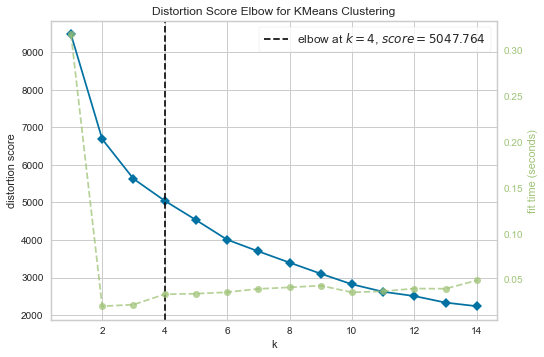

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
#Use this in anaconda installer to get it working:
#conda install -c conda-forge yellowbrick
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15)).fit(x)
visualizer.show()

#Based off the graph the optimal number of clusters is 4

In [10]:
#K-means++ uses seeding technique for centroid initialization better than random initialization
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=1).fit(x)

In [11]:
#Check prediction on x data - cluster labels
y_kmeans = kmeans.predict(x)
y_kmeans = pd.DataFrame(y_kmeans)
y_kmeans
#prediction = pd.DataFrame(y_kmeans)
#prediction.head(10)

,0
0,0
1,0
2,0
3,0
4,3
...,...
346,3
347,3
348,0
349,0


In [12]:
#Cluster size for each of the 3 clusters
Counter(kmeans.labels_)

Counter({0: 271, 3: 78, 2: 1, 1: 1})

In [13]:
#Centers for the kmeans clusters
center = kmeans.cluster_centers_
center

array([[-2.99445995e-01, -1.25299149e-01, -2.24536945e-01,
         7.59091277e-02,  1.35526240e-02,  1.47951683e-02,
        -3.97209463e-01, -3.97209463e-01, -3.97088808e-01,
        -1.48672603e-01, -1.56381675e-02, -1.04132793e-01,
        -1.56797414e-01, -1.42438931e-01, -1.94722165e-01,
        -2.59402220e-02, -1.10290265e-01, -2.42114926e-01,
        -1.63766427e-01, -2.15795774e-01, -2.15038412e-01,
        -2.37244980e-01,  7.20736705e-02,  1.88419693e-02,
        -8.80968348e-02,  1.97441711e-02,  1.66230072e-01],
       [-2.18105273e-02, -4.80374615e-02,  2.20584784e+00,
         1.18123842e-01, -2.28799824e+00, -2.31832725e-01,
        -6.79722217e-01, -6.79722217e-01, -6.79546610e-01,
         4.02649916e+00, -1.54537895e-01,  3.59054238e+00,
         1.75429193e+01,  4.00260300e+00,  1.80273199e+00,
        -1.39249666e-01,  1.93994221e+00,  1.50548731e+01,
         2.09881109e+00,  2.60206163e+00,  2.62828714e+00,
         1.50907804e+00,  4.35849045e-01, -6.52736132e-

[Text(0.5, 1.0, 'PCA Transformed Y-Variables')]

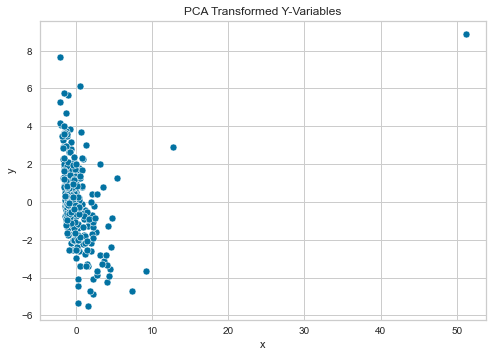

In [14]:
# because the clusters are super high dimensional we have to use PCA to project into 2 dimensions
# I have no idea what the 0/1 labels are here, but this does appear to be the data at least at a high level?
# the 0/1 could be positive/negative as PCA typically is centered around 0...
# regardless we see a high number of outliers
#Want explained variance between %95-99 generally. Lower n_components to 0.95
pca = PCA(n_components=2)
pca.fit(x)
points = pca.transform(x)
centers = pca.transform(center)
plot_data = {"points":{"x": points[0], "y": points[1]}, "centers":{"x": centers[0], "y": centers[1]}}
sns.scatterplot(x="x", y="y", data={"x": points[:,0], "y": points[:,1]}).set(title = "PCA Transformed Y-Variables")


<AxesSubplot:>

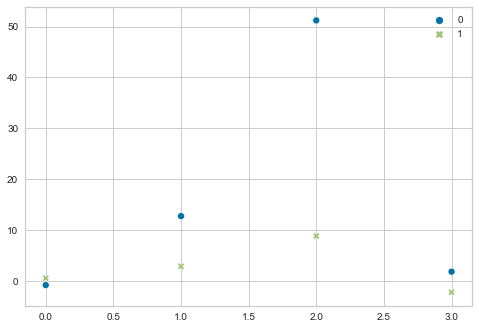

In [15]:
sns.scatterplot(data=centers)

<AxesSubplot:xlabel='Percent Cases Total', ylabel='Percent Cases Last 14 Days'>

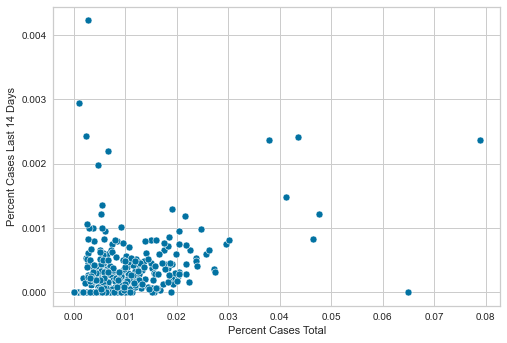

In [16]:
# now what I originally thought we would be doing:
# use k-means on only the 1st 2 variables to determine how cities did vs covid in general
x2 = df.iloc[:, 1:3]
sns.scatterplot(x="Percent Cases Total", y="Percent Cases Last 14 Days", data=x2)

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


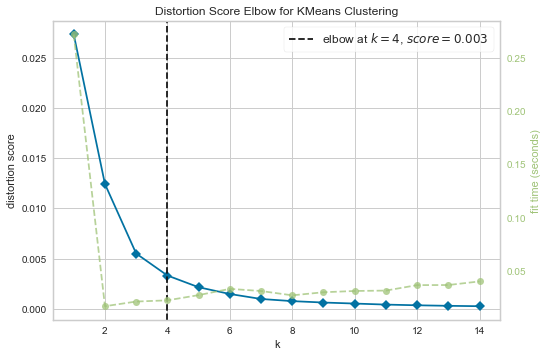

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15)).fit(x2)
visualizer.show()

#Based off the graph the optimal number of clusters is 4

In [18]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(x2)
#y_kmeans = cluster labels 
y_kmeans = kmeans.predict(x2)
y_kmeans = pd.DataFrame(y_kmeans)
Counter(kmeans.labels_)

Counter({1: 61, 3: 111, 0: 172, 2: 7})

In [19]:
center = kmeans.cluster_centers_
center

array([[0.00388232, 0.00026792],
       [0.01956115, 0.0004375 ],
       [0.05147281, 0.00152257],
       [0.01021211, 0.00026379]])

### KNN Model Creation

In [20]:
# next steps... predict k nearest neighbors
#Reload the main dataframe excluding the y vals columns and use standard scaler on it
x = df.iloc[:, 3:29]
#Scale data since some numbers are extremly large
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
#Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
pca.fit(x)
x3 = pca.transform(x)

In [21]:
#Split data into training and testing sets - use 80% as training
X_train, X_test, y_train, y_test = train_test_split(x3, y_kmeans, test_size=0.20, random_state=43)
#Find the best performing value of k
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)
#The best number of neighbors on the training set is 47 <- this changes with each run

{'n_neighbors': 19}


In [22]:
neigh = KNeighborsClassifier(n_neighbors=28)
neigh = neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


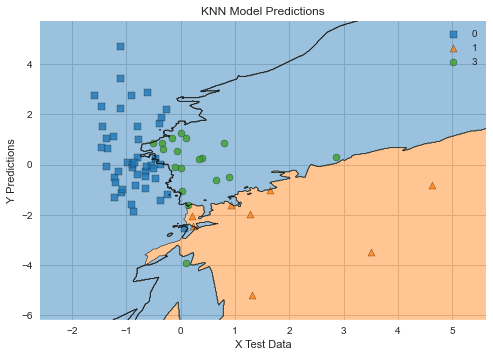

In [23]:


plot_decision_regions(X_test, y_pred, clf = neigh)
plt.xlabel("X Test Data")
plt.ylabel("Y Predictions")
plt.title("KNN Model Predictions")
plt.show()

In [24]:
#Evaluate how we did
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74        33
           1       0.62      0.36      0.45        14
           2       0.00      0.00      0.00         1
           3       0.56      0.43      0.49        23

    accuracy                           0.62        71
   macro avg       0.46      0.42      0.42        71
weighted avg       0.60      0.62      0.59        71



C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
score = metrics.accuracy_score(y_test, y_pred)
print("Classification Accuracy(Percent of Correct Predictions): ", score*100)
misclass = 1 - metrics.accuracy_score(y_test, y_pred)
print("Misclassification Rate(Percent of Misclassified Predictions): ", misclass*100)

#Stuff below is in the classification report shown above
#sensitivity = metrics.recall_score(y_test, y_pred)
#print("Sensitivity: ", sensitivity)
#precision = metrics.precision_score(y_test, y_pred)
#print("Precision: ", precision)

Classification Accuracy(Percent of Correct Predictions):  61.97183098591549
Misclassification Rate(Percent of Misclassified Predictions):  38.02816901408451


In [26]:
print(metrics.confusion_matrix(y_test, y_pred))

[[29  0  0  4]
 [ 5  5  0  4]
 [ 0  1  0  0]
 [11  2  0 10]]


### Retry KNN Model with Sequential Feature Selection

In [27]:
#Retry with Sequential Feature Selection

#Might want to chnage this based off of whatever is the best
neigh = KNeighborsClassifier(n_neighbors=38)
#Number of features to select. For some reason I can't choose more than 1
n_features = 1
sfs = SequentialFeatureSelector(neigh, n_features_to_select = n_features, direction='forward')
sfs.fit(X_test, y_pred)

#Some sort of numpy error for this
#print("Top {} features selected by forward sequential selection:{}".format(n_features, list(X_test.columns[sfs.get_support()])))

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=38),
                          n_features_to_select=1)

In [28]:
#Try bootstrapping the sample after PCA/standardizing
boot = resample(x3, replace=True, n_samples=351, random_state=1)
print('Bootstrap Sample: %s' % boot)

Bootstrap Sample: [[-8.98508723e-01  2.05822635e-01]
 [ 2.19734640e+00 -5.07902991e+00]
 [ 7.89887401e-01  8.67488638e-01]
 [-9.98541500e-01 -2.52216086e+00]
 [-1.36574139e+00 -2.49220243e-01]
 [-5.15665733e-01 -5.22289828e-02]
 [ 1.96959468e+00  9.23897385e-02]
 [-4.36739144e-01  2.69385549e-02]
 [-1.22603827e+00 -1.46826822e+00]
 [ 8.34918878e-01 -5.65421934e-01]
 [-5.71186333e-01 -3.25706286e-02]
 [-6.50797755e-01 -2.72616293e-01]
 [-9.85939268e-01  1.07561663e-01]
 [-3.50466977e-01  1.13738615e-01]
 [-1.38458145e+00  1.05317371e+00]
 [-1.34931602e+00  3.54613004e+00]
 [-9.64593841e-01  2.78067462e-01]
 [ 9.02273068e-01 -1.23755343e+00]
 [-1.23778705e+00 -5.11247656e-01]
 [-5.70525183e-01  1.01796848e+00]
 [-1.26295536e+00  3.86830449e+00]
 [-1.05393085e+00  2.92408143e+00]
 [-8.28883790e-01  1.22812118e+00]
 [ 3.70786406e-01 -1.56837988e+00]
 [-1.15749008e+00 -2.53610908e-01]
 [-1.40946583e+00  3.56209013e+00]
 [-1.48731793e+00  1.91627360e+00]
 [ 1.70557450e+00 -9.29316936e-01]
 [

In [29]:
X_train, X_test, y_train, y_test = train_test_split(boot, y_kmeans, test_size=0.20, random_state=42)

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)
#k = 46 is best <- this will change 

{'n_neighbors': 48}


In [30]:
neigh = KNeighborsClassifier(n_neighbors=49)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


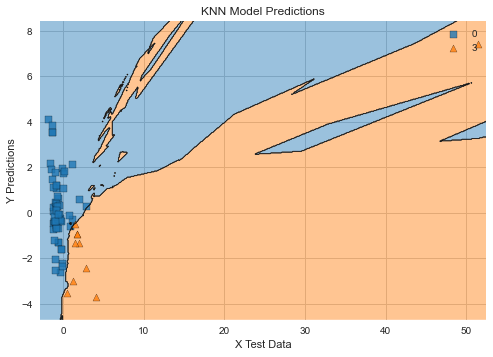

In [31]:
plot_decision_regions(X_test, y_pred, clf = neigh)
plt.xlabel("X Test Data")
plt.ylabel("Y Predictions")
plt.title("KNN Model Predictions")
plt.show()

In [32]:
#Evaluate how we did
print(classification_report(y_test, y_pred))

#F1 Score is between 38 and 42 percent. Even worse than before. 

              precision    recall  f1-score   support

           0       0.48      0.85      0.61        34
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         3
           3       0.40      0.17      0.24        24

    accuracy                           0.46        71
   macro avg       0.22      0.25      0.21        71
weighted avg       0.36      0.46      0.37        71



C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Correlation Analysis

In [33]:
X=df.iloc[:, 3:29]
columns=df.iloc[:, 3:29].columns

In [34]:
X.corr()

,Population,Median annual household income,Residential Tax Rating,Open Space Tax Rating,Commercial Tax Rating,Industrial Tax Rating,Personal Property Tax Rating,Residential APV,Open Space APV,Commercial APV,...,Industrial Levy,Personal Property Levy,Labor Force,Employed,Unemployed,EQV Per Capita,Total Revenues,Meals Tax Rate,Marijuana Tax Rate,Scaled 2019 Bond Rating
Population,1.000000,-0.101065,-0.089039,-0.015968,0.291461,0.291461,0.291609,0.902282,0.000260,0.894850,...,0.443066,0.946965,0.996020,0.995476,0.982218,-0.078095,-0.006555,0.122909,0.046108,-0.262371
Median annual household income,-0.101065,1.000000,0.037523,0.054881,-0.116664,-0.116664,-0.116774,0.060176,0.063182,-0.038207,...,-0.016056,-0.083475,-0.087457,-0.084991,-0.178699,0.008300,0.005880,-0.037785,0.093862,-0.320449
Residential Tax Rating,-0.089039,0.037523,1.000000,-0.018633,0.531321,0.531321,0.531549,-0.254981,-0.096031,-0.120310,...,-0.133253,-0.069985,-0.100294,-0.100840,-0.075951,-0.579976,0.025406,-0.038096,0.057599,0.004366
Open Space Tax Rating,-0.015968,0.054881,-0.018633,1.000000,-0.053424,-0.053424,-0.053529,0.005308,0.563528,-0.015798,...,0.000943,-0.017544,-0.015933,-0.015883,-0.017286,0.004619,-0.008871,-0.011302,0.025527,-0.035072
Commercial Tax Rating,0.291461,-0.116664,0.531321,-0.053424,1.000000,1.000000,0.999994,0.060733,-0.025019,0.084972,...,0.274147,0.227889,0.264474,0.262538,0.329282,-0.444215,-0.017057,0.072926,0.010113,-0.205543
Industrial Tax Rating,0.291461,-0.116664,0.531321,-0.053424,1.000000,1.000000,0.999994,0.060733,-0.025019,0.084972,...,0.274147,0.227889,0.264474,0.262538,0.329282,-0.444215,-0.017057,0.072926,0.010113,-0.205543
Personal Property Tax Rating,0.291609,-0.116774,0.531549,-0.053529,0.999994,0.999994,1.000000,0.060788,-0.025138,0.085034,...,0.274253,0.227983,0.264603,0.262666,0.329457,-0.444346,-0.017026,0.072953,0.010424,-0.205274
Residential APV,0.902282,0.060176,-0.254981,0.005308,0.060733,0.060733,0.060788,1.000000,0.072318,0.923182,...,0.440836,0.893373,0.920501,0.921847,0.837039,0.088891,-0.009285,0.127769,0.100144,-0.281344
Open Space APV,0.000260,0.063182,-0.096031,0.563528,-0.025019,-0.025019,-0.025138,0.072318,1.000000,0.000687,...,0.062994,0.006337,-0.002697,-0.002749,-0.000590,0.083396,-0.004084,0.071405,-0.004557,-0.032694
Commercial APV,0.894850,-0.038207,-0.120310,-0.015798,0.084972,0.084972,0.085034,0.923182,0.000687,1.000000,...,0.403569,0.965021,0.919956,0.921406,0.832533,0.006654,-0.005886,0.068167,0.062494,-0.165709


In [35]:
# Labor Force, Employed, Unemployed are very highly correlated with Population (>0.95)
# Commercial Tax Rating and Industrial Tax Raring are highly correlated with Personal Propert Tax rating (>0.95))
# commercial Levy is highly correlated with commercial APV (>0.99) and with personal property Levy (>0.95) and Personal Property APV (>0.95)

In [36]:
vif_x=add_constant(X)
pd.Series([variance_inflation_factor(vif_x.values,i) for i in range(vif_x.shape[1])], index=vif_x.columns)

C:\Users\Ryan\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const                             7.941352e+01
Population                        1.026695e+03
Median annual household income    2.037900e+00
Residential Tax Rating            2.820089e+00
Open Space Tax Rating             1.547467e+00
Commercial Tax Rating             4.503600e+15
Industrial Tax Rating             4.503600e+15
Personal Property Tax Rating      8.241730e+04
Residential APV                   9.821888e+01
Open Space APV                    2.441207e+01
Commercial APV                    1.731525e+03
Industrial APV                    7.005092e+01
Personal Property APV             3.368592e+02
Residential Levy                  6.548465e+01
Open Space Levy                   2.366170e+01
Commercial Levy                   1.695012e+03
Industrial Levy                   4.513354e+01
Personal Property Levy            3.416939e+02
Labor Force                                inf
Employed                                   inf
Unemployed                                 inf
EQV Per Capit

In [37]:
vif_x=add_constant(X)
pd.Series([variance_inflation_factor(vif_x.values,i) for i in range(vif_x.shape[1])], index=vif_x.columns)

const                             7.941352e+01
Population                        1.026695e+03
Median annual household income    2.037900e+00
Residential Tax Rating            2.820089e+00
Open Space Tax Rating             1.547467e+00
Commercial Tax Rating             4.503600e+15
Industrial Tax Rating             4.503600e+15
Personal Property Tax Rating      8.241730e+04
Residential APV                   9.821888e+01
Open Space APV                    2.441207e+01
Commercial APV                    1.731525e+03
Industrial APV                    7.005092e+01
Personal Property APV             3.368592e+02
Residential Levy                  6.548465e+01
Open Space Levy                   2.366170e+01
Commercial Levy                   1.695012e+03
Industrial Levy                   4.513354e+01
Personal Property Levy            3.416939e+02
Labor Force                                inf
Employed                                   inf
Unemployed                                 inf
EQV Per Capit

In [38]:
vif_x=add_constant(X[columns])
pd.Series([variance_inflation_factor(vif_x.values,i) for i in range(vif_x.shape[1])], index=vif_x.columns)

const                             7.941352e+01
Population                        1.026695e+03
Median annual household income    2.037900e+00
Residential Tax Rating            2.820089e+00
Open Space Tax Rating             1.547467e+00
Commercial Tax Rating             4.503600e+15
Industrial Tax Rating             4.503600e+15
Personal Property Tax Rating      8.241730e+04
Residential APV                   9.821888e+01
Open Space APV                    2.441207e+01
Commercial APV                    1.731525e+03
Industrial APV                    7.005092e+01
Personal Property APV             3.368592e+02
Residential Levy                  6.548465e+01
Open Space Levy                   2.366170e+01
Commercial Levy                   1.695012e+03
Industrial Levy                   4.513354e+01
Personal Property Levy            3.416939e+02
Labor Force                                inf
Employed                                   inf
Unemployed                                 inf
EQV Per Capit

In [39]:
# 2 classes, 1 being improved vs avg, 0 being didn't improve
target=[]
total=list(df['Percent Cases Total'])
last_2_weeks=list(df['Percent Cases Last 14 Days'])
for i in range(351):
    if(total[i]/12<last_2_weeks[i]):
        target.append(1)
    else:
        target.append(0)

In [40]:
y=target

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X[columns], y, test_size=0.20, random_state=1)

In [42]:
clf=LogisticRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9295774647887324

In [43]:
clf=RandomForestClassifier(min_samples_leaf=6, # vary max_depth between 3 and 6
n_estimators=200, random_state=42)

clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9154929577464789

In [44]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
neigh.score(X_test,y_test)

0.8591549295774648

In [45]:
clf=DecisionTreeClassifier(max_depth=2)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9295774647887324

In [46]:
loo=LeaveOneOut() 


In [47]:
model=LogisticRegression()
scores = cross_val_score(model, X[columns], y, scoring='accuracy',
                         cv=loo, n_jobs=-1)
scores.mean()

0.8803418803418803

In [48]:
model=DecisionTreeClassifier(max_depth=2)
scores = cross_val_score(model, X[columns], y, scoring='accuracy',
                         cv=loo, n_jobs=-1)
scores.mean()

0.8746438746438746

In [49]:
model=neigh
scores = cross_val_score(model, X[columns], y, scoring='accuracy',
                         cv=loo, n_jobs=-1)
scores.mean()

0.8290598290598291

In [50]:
model=RandomForestClassifier(min_samples_leaf=6, # vary max_depth between 3 and 6
                                n_estimators=200, random_state=42)
scores = cross_val_score(model, X[columns], y, scoring='accuracy',
                         cv=loo, n_jobs=-1)
scores.mean()

0.8774928774928775

### Decision Trees

In [51]:
# using 4 classes here
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(x2)
#y_kmeans = cluster labels 
y_kmeans = kmeans.predict(x2)
y_kmeans = pd.DataFrame(y_kmeans)
Counter(kmeans.labels_)


Counter({1: 61, 3: 111, 0: 172, 2: 7})

In [52]:

X_train, X_test, y_train, y_test = train_test_split(x, y_kmeans, random_state=43, test_size=0.10)
dt_X_train, dt_X_test = scaler.inverse_transform(X_train), scaler.inverse_transform(X_test)
print(dt_X_train.shape)
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(dt_X_train, y_train)
dt_clf2 = tree.DecisionTreeClassifier(max_depth=2)
dt_clf2.fit(dt_X_train, y_train)
print(dt_clf.score(dt_X_test, y_test), dt_clf2.score(dt_X_test, y_test))
dt_clf.score(dt_X_train, y_train)

(315, 25)
0.6944444444444444 0.6666666666666666


0.834920634920635

In [53]:
print(classification_report(dt_clf.predict(dt_X_test), y_test))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        18
           1       0.43      0.60      0.50         5
           3       0.71      0.38      0.50        13

    accuracy                           0.69        36
   macro avg       0.64      0.64      0.62        36
weighted avg       0.70      0.69      0.67        36



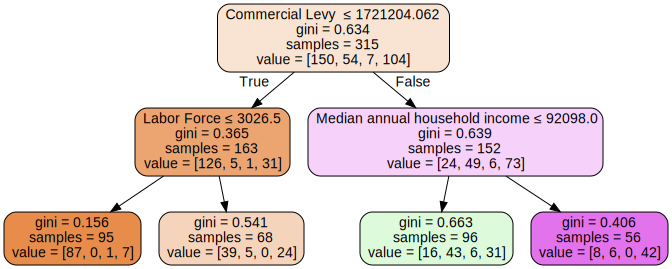

In [54]:
dot_data = tree.export_graphviz(dt_clf2, out_file=None,
                               feature_names=df.iloc[:, 3:29].keys(),
                               filled=True, rounded=True,
                               special_characters=True)
pydot.graph_from_dot_data(dot_data)[0].write_pdf('dt_clf4.pdf')
graphviz.Source(dot_data)

In [55]:
rf_clf = RandomForestClassifier(min_samples_leaf=6, # vary max_depth between 3 and 6
                                n_estimators=200, random_state=42)
rf_clf.fit(dt_X_train, y_train)
print(rf_clf.score(dt_X_test, y_test))
rf_clf.score(dt_X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\Ryan\AppData\Local\Temp/ipykernel_44192/820143623.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(dt_X_train, y_train)


0.6666666666666666
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        22
           1       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         7

    accuracy                           0.61        36
   macro avg       0.20      0.33      0.25        36
weighted avg       0.37      0.61      0.46        36



C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LOOCV For All Models

In [56]:
# we were able to get a 74% accuracy using the random forest method
# because of severe class imbalance we are trying leave one out cross validation to trade
# an increase in variance for a reduction in bias
loo = LeaveOneOut()

# perform LOO CV
splits = loo.split(x)
avg_score = 0
avg_train_score = 0
x_loo = np.array(x)
y_loo = np.array(y_kmeans)
i = 1
for train_splits, test_splits in splits:
    #criterion='entropy',
    rf_clf = RandomForestClassifier(min_samples_leaf=6, # vary max_depth between 3 and 6
                                    n_estimators=200, random_state=42)
    #print(i)
    rf_clf.fit(x_loo[train_splits], y_loo[train_splits].ravel())
    avg_train_score += rf_clf.score(x_loo[train_splits], y_loo[train_splits])/351
    avg_score += rf_clf.score(x_loo[test_splits], y_loo[test_splits])/351
    i += 1
print(avg_score, avg_train_score)
#print(rf_clf.score(X_train, y_train), rf_clf.score(X_test, y_test))

0.6524216524216508 0.8164509564509578


In [57]:
ab_clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=2), n_estimators=50)
# perform LOO CV
splits = loo.split(x)
avg_score = 0
avg_train_score = 0
x_loo = np.array(x)
y_loo = np.array(y_kmeans)
i = 1
for train_splits, test_splits in splits:
    #print(i)
    ab_clf.fit(x_loo[train_splits], y_loo[train_splits].ravel())
    avg_train_score += ab_clf.score(x_loo[train_splits], y_loo[train_splits])/351
    avg_score += ab_clf.score(x_loo[test_splits], y_loo[test_splits])/351
    i += 1
print(avg_score, avg_train_score)

0.5811965811965808 0.6674969474969482


In [58]:
dt_clf = tree.DecisionTreeClassifier(max_depth=2)
splits = loo.split(x)
avg_score = 0
avg_train_score = 0
x_loo = np.array(x)
y_loo = np.array(y_kmeans)
i = 1
for train_splits, test_splits in splits:
    #print(i)
    dt_clf.fit(x_loo[train_splits], y_loo[train_splits].ravel())
    avg_train_score += dt_clf.score(x_loo[train_splits], y_loo[train_splits])/351
    avg_score += dt_clf.score(x_loo[test_splits], y_loo[test_splits])/351
    i += 1
print(avg_score, avg_train_score)

0.5897435897435892 0.6730077330077331


In [59]:
neigh = KNeighborsClassifier(weights='distance', n_neighbors=18)
splits = loo.split(x)
avg_score = 0
avg_train_score = 0
x_loo = np.array(x)
y_loo = np.array(y_kmeans)
i = 1
for train_splits, test_splits in splits:
    #print(i)
    neigh.fit(x_loo[train_splits], y_loo[train_splits].ravel())
    avg_train_score += neigh.score(x_loo[train_splits], y_loo[train_splits])/351
    avg_score += neigh.score(x_loo[test_splits], y_loo[test_splits])/351
    i += 1
print(avg_score, avg_train_score)

0.6438746438746424 0.9999999999999927


In [60]:
lr_clf = LogisticRegression(random_state=42)
splits = loo.split(x)
avg_score = 0
avg_train_score = 0
x_loo = np.array(x)
y_loo = np.array(y_kmeans)
i = 1
for train_splits, test_splits in splits:
    #print(i)
    lr_clf.fit(x_loo[train_splits], y_loo[train_splits].ravel())
    avg_train_score += lr_clf.score(x_loo[train_splits], y_loo[train_splits])/351
    avg_score += lr_clf.score(x_loo[test_splits], y_loo[test_splits])/351
    i += 1
print(avg_score, avg_train_score)

0.649572649572648 0.7033536833536842


# Logistic Regression w/o L1

In [61]:
#Reload the main dataframe excluding the y vals columns and use standard scaler on it
x = df.iloc[:, 3:29]

#Scale data since some numbers are extremly large
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scalex = scaler.fit_transform(x)
scalex = pd.DataFrame(scalex)

#PCA to help reduce dimensionality, determined 25 components via scree plot
pca = PCA(n_components=25)
pca.fit(x)
pca_x = pca.transform(x)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y_kmeans, test_size=0.10, random_state=1)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(pca_x, y_kmeans, test_size=0.1, random_state=1)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(scalex, y_kmeans, test_size=0.1, random_state=1)

In [63]:
# grid search because sometimes early-stopping can improve generalization
param_grid_lr = {
    'max_iter': [200, 500, 1000],                      
    'solver': ['liblinear','saga']
}

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logreg=LogisticRegression(penalty='l1')
logreg_cv=GridSearchCV(logreg,param_grid_lr,cv=10)
logreg_cv.fit(X_train,y_train)

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-p

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\li

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\li

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\li

GridSearchCV(cv=10, estimator=LogisticRegression(penalty='l1'),
             param_grid={'max_iter': [200, 500, 1000],
                         'solver': ['liblinear', 'saga']})

In [65]:
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'max_iter': 200, 'solver': 'liblinear'}
0.6543346774193549


In [66]:
# without preprocessing
clf = LogisticRegression(random_state=0,solver = 'liblinear',max_iter = 500).fit(X_train, y_train)
clf.score(X_test,y_test)

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6944444444444444

In [67]:
clf.coef_

array([[-3.23067294e-09,  2.77772181e-06,  6.02710177e-10,
        -1.62016178e-11,  5.86612607e-10,  5.86612607e-10,
         5.86828885e-10,  8.16925150e-11,  7.98988875e-07,
        -4.28115504e-09,  2.95288857e-08, -1.73750016e-08,
        -1.92493978e-08,  1.43568495e-08, -1.13720462e-07,
        -1.63609556e-06,  1.09864600e-06, -3.10466246e-09,
        -2.98555610e-09, -1.19106362e-10,  3.65631259e-06,
        -7.70717955e-11,  1.91357256e-13,  5.14192395e-13,
         3.23985924e-10],
       [ 1.86158301e-07, -5.11022035e-06, -1.15793613e-09,
         9.65127921e-11, -1.07815050e-09, -1.07815050e-09,
        -1.07755103e-09, -1.40985121e-10, -1.98699037e-07,
        -3.10989183e-10, -2.26949265e-09, -1.79793437e-09,
         1.30990189e-08, -1.58632819e-09,  1.08379534e-07,
         1.33563339e-07, -8.31155245e-08,  1.23547485e-07,
         1.20370946e-07,  3.17653909e-09, -1.05147741e-05,
         1.92724777e-10, -2.50165657e-13, -1.68078754e-12,
        -6.35911133e-10],
    

In [68]:
#normalized 
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(random_state=0,solver = 'liblinear',max_iter = 500).fit(X_train_n, y_train_n)
clf2.score(X_test_n,y_test_n)

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6111111111111112

In [69]:
clf2.coef_

array([[-0.58757852,  0.23214853,  0.48605946, -0.13964606, -0.21595679,
        -0.21595679, -0.20702978,  0.28715725,  0.36385335, -0.40884969,
         0.0057684 , -0.23905228, -1.37170256, -0.07439628, -0.28483559,
        -0.53651761,  0.11556258, -0.71192698, -0.70976979, -0.7696386 ,
         0.04333259, -0.27100453,  0.14906187,  0.01968193,  0.51481694],
       [ 0.04899106, -0.06169679, -0.51526625,  0.39634029,  0.24205081,
         0.24205081,  0.29207792, -0.49322531, -0.26765691,  0.25666459,
        -0.08893578,  0.00566533, -0.19667033, -0.38713574,  0.31518132,
        -0.08579096, -0.02247827,  0.37708571,  0.38583637,  0.02946508,
        -0.89811485,  0.36440129,  0.20288612, -0.51931804, -0.56958351],
       [ 0.56301062, -0.61477561, -0.5125552 , -0.02056585,  0.17389764,
         0.17389764,  0.1746287 , -0.2779698 , -0.13858719, -0.10838694,
         0.02520007, -0.50972264, -0.00307124,  0.05623412, -0.09852427,
        -0.23249977, -0.71096527,  0.51395081,  0

In [70]:
# pca 
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression(random_state=0,solver = 'liblinear',max_iter = 500).fit(X_train_p, y_train_p)
clf3.score(X_test_p,y_test_p)

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6388888888888888

# Logistic Regression with L1

In [71]:
# no preprocs
from sklearn.linear_model import LogisticRegression
clf4 = LogisticRegression(random_state=0,solver = 'liblinear',max_iter = 1000,penalty = 'l1').fit(X_train, y_train)
clf4.score(X_test,y_test)

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.6666666666666666

In [72]:
#normalized 
from sklearn.linear_model import LogisticRegression
clf5 = LogisticRegression(random_state=1,solver = 'liblinear',max_iter = 500, C=1000,penalty ='l1').fit(X_train_n, y_train_n)
clf5.score(X_test_n,y_test_n)

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6388888888888888

In [73]:
from sklearn.linear_model import LogisticRegression
clf6 = LogisticRegression(random_state=1,solver = 'saga',penalty ='elasticnet', max_iter = 900,l1_ratio = 0.1).fit(X_train_p, y_train_p)
clf6.score(X_test_p,y_test_p)

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.6111111111111112

In [74]:
y_pred = clf.predict(X_test)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.67      0.50      0.57         8
           2       0.00      0.00      0.00         1
           3       0.44      0.44      0.44         9

    accuracy                           0.69        36
   macro avg       0.48      0.47      0.47        36
weighted avg       0.66      0.69      0.67        36

[[17  0  0  1]
 [ 0  4  0  4]
 [ 0  1  0  0]
 [ 4  1  0  4]]


C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
test_acc =[]
train_acc = []

test_acc_n = []
test_acc_pca = []

for i in range(351):
    
    X_test = x.iloc[[i]]
    y_test = y_kmeans.iloc[[i]]
    X_train = x.drop(i)
    y_train = y_kmeans.drop(i)
    
    X_test_n = scalex.iloc[[i]]
    y_test_n = y_kmeans.iloc[[i]]
    X_train_n = scalex.drop(i)
    y_train_n = y_kmeans.drop(i)
    
    X_test_p = pd.DataFrame(pca_x).iloc[[i]]
    y_test_p = y_kmeans.iloc[[i]]
    X_train_p = pd.DataFrame(pca_x).drop(i)
    y_train_p = y_kmeans.drop(i)
    
    
    clf = LogisticRegression(random_state=2,solver = 'liblinear',max_iter = 500).fit(X_train, y_train)
    clf2 = LogisticRegression(random_state=2,solver = 'liblinear',max_iter = 500).fit(X_train_n, y_train_n)
    clf3 = LogisticRegression(random_state=2,solver = 'liblinear',max_iter = 500).fit(X_train_p, y_train_p)
    
    #clf4 = LogisticRegression(random_state=2,solver = 'saga',penalty ='elasticnet', max_iter = 600, l1_ratio =0.01).fit(X_train_p, y_train_p)
    #clf5 = LogisticRegression(random_state=2,solver = 'saga',penalty ='elasticnet', max_iter = 600, l1_ratio =1e-5).fit(X_train_p, y_train_p)
    
    test_acc.append(clf.score(X_test,y_test))
    test_acc_n.append(clf2.score(X_test_n,y_test_n))
    test_acc_pca.append(clf3.score(X_test_p,y_test_p))
    #test_acc.append(clf5.score(X_test_p,y_test_p))
    #test_acc_n.append(clf5.score(X_train_p,y_train_p))

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [77]:
#In order - Test Accuracy, Normalized Test Accuracy, PCA Test Accuracy

print(sum(test_acc)/351)
print(sum(test_acc_n)/351)
print(sum(test_acc_pca)/351)

0.6267806267806267
0.6381766381766382
0.6210826210826211


# 2 class K-means

In [78]:
# now for the 2 class case
#K-means++ uses seeding technique for centroid initialization better than random initialization
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=1).fit(x)
#Check prediction on x data - cluster labels
y_kmeans = kmeans.predict(x)
y_kmeans = pd.DataFrame(y_kmeans)
y_kmeans
#prediction = pd.DataFrame(y_kmeans)
#prediction.head(10)

,0
0,0
1,2
2,0
3,0
4,0
...,...
346,2
347,2
348,0
349,0


In [79]:
# we were able to get a 74% accuracy using the random forest method
# because of severe class imbalance we are trying leave one out cross validation to trade
# an increase in variance for a reduction in bias
loo = LeaveOneOut()
# perform LOO CV
splits = loo.split(x)
avg_score = 0
avg_train_score = 0
x_loo = np.array(x)
y_loo = np.array(y_kmeans)
i = 1
for train_splits, test_splits in splits:
    #criterion='entropy',
    rf_clf = RandomForestClassifier(min_samples_leaf=6, # vary max_depth between 3 and 6
                                    n_estimators=200, random_state=42)
    #print(i)
    rf_clf.fit(x_loo[train_splits], y_loo[train_splits].ravel())
    avg_train_score += rf_clf.score(x_loo[train_splits], y_loo[train_splits])/351
    avg_score += rf_clf.score(x_loo[test_splits], y_loo[test_splits])/351
    i += 1
print(avg_score, avg_train_score)
ab_clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=2), n_estimators=50)
# perform LOO CV
splits = loo.split(x)
avg_score = 0
avg_train_score = 0
x_loo = np.array(x)
y_loo = np.array(y_kmeans)
i = 1
for train_splits, test_splits in splits:
    #print(i)
    ab_clf.fit(x_loo[train_splits], y_loo[train_splits].ravel())
    avg_train_score += ab_clf.score(x_loo[train_splits], y_loo[train_splits])/351
    avg_score += ab_clf.score(x_loo[test_splits], y_loo[test_splits])/351
    i += 1
print(avg_score, avg_train_score)
dt_clf = tree.DecisionTreeClassifier(max_depth=2)
splits = loo.split(x)
avg_score = 0
avg_train_score = 0
x_loo = np.array(x)
y_loo = np.array(y_kmeans)
i = 1
for train_splits, test_splits in splits:
    #print(i)
    dt_clf.fit(x_loo[train_splits], y_loo[train_splits].ravel())
    avg_train_score += dt_clf.score(x_loo[train_splits], y_loo[train_splits])/351
    avg_score += dt_clf.score(x_loo[test_splits], y_loo[test_splits])/351
    i += 1
print(avg_score, avg_train_score)
neigh = KNeighborsClassifier(weights='distance', n_neighbors=18)
splits = loo.split(x)
avg_score = 0
avg_train_score = 0
x_loo = np.array(x)
y_loo = np.array(y_kmeans)
i = 1
for train_splits, test_splits in splits:
    #print(i)
    neigh.fit(x_loo[train_splits], y_loo[train_splits].ravel())
    avg_train_score += neigh.score(x_loo[train_splits], y_loo[train_splits])/351
    avg_score += neigh.score(x_loo[test_splits], y_loo[test_splits])/351
    i += 1
print(avg_score, avg_train_score)

0.9800569800569731 0.9857549857549828
0.9914529914529843 0.9999999999999927
0.9914529914529843 0.9971509971509929
0.9829059829059759 0.9999999999999927


In [80]:
sf = shapefile.Reader("townssurvey_shp/TOWNSSURVEY_POLYM")
print(sf)

shapefile Reader
    351 shapes (type 'POLYGON')
    351 records (17 fields)


In [81]:
sf.shapeType

5

In [82]:
%matplotlib inline

In [83]:
mass = gpd.read_file("townssurvey_shp/TOWNSSURVEY_POLYM.shp")

In [84]:
mass.head()

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,SUM_ACRES,SUM_SQUARE,POP2010,POPCH00_10,POPCH80_90,SHAPE_Leng,SHAPE_Area,geometry
0,LOWELL,160,93473,103439,105167,1728,C,4,25017,9298.780,14.531,106519,1352,9966,28403.664058,3.763066e+07,"POLYGON ((216431.383 935122.985, 217384.292 93..."
1,BEVERLY,30,34575,38195,39862,1667,C,1,25009,9863.262,15.411,39502,-360,3620,38638.706350,3.991521e+07,"MULTIPOLYGON (((247412.633 926932.675, 249132...."
2,GLOUCESTER,107,28092,28716,30273,1557,C,3,25009,17088.570,26.700,28789,-1484,624,159379.402958,6.915496e+07,"MULTIPOLYGON (((264186.562 935044.815, 264207...."
3,CHESTER,59,1182,1280,1308,28,T,4,25013,23784.924,37.164,1337,29,98,37542.272855,9.625415e+07,"POLYGON ((80255.212 900279.565, 84998.072 8998..."
4,WINCHESTER,344,20021,20267,20810,543,T,2,25017,4062.159,6.347,21374,564,246,19080.564132,1.643902e+07,"POLYGON ((232109.422 913780.365, 231307.062 91..."


In [85]:
mass = mass.sort_values(by='TOWN')
mass.head()

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,SUM_ACRES,SUM_SQUARE,POP2010,POPCH00_10,POPCH80_90,SHAPE_Leng,SHAPE_Area,geometry
219,ABINGTON,1,13579,13817,14605,788,T,3,25023,6521.335,10.190,15985,1380,238,24139.413120,2.639085e+07,"POLYGON ((248314.472 872355.495, 245760.093 87..."
308,ACTON,2,17672,17872,20331,2459,T,2,25017,12988.988,20.295,21924,1593,200,30789.187913,5.256453e+07,"POLYGON ((209456.373 917108.875, 205727.133 90..."
135,ACUSHNET,3,8808,9554,10161,607,T,3,25005,12081.818,18.878,10303,142,746,31637.669325,4.889337e+07,"POLYGON ((252855.852 827963.595, 253437.492 82..."
203,ADAMS,4,10181,9445,8809,-636,T,3,25003,14694.491,22.960,8485,-324,-736,31135.753626,5.946649e+07,"POLYGON ((71824.763 934966.135, 71785.163 9344..."
186,AGAWAM,5,26754,27323,28144,821,TC,4,25013,15574.332,24.335,28438,294,569,38060.713034,6.302191e+07,"POLYGON ((102185.312 873555.665, 102188.042 87..."


In [86]:
rf_clf = RandomForestClassifier(min_samples_leaf=6, # vary max_depth between 3 and 6
                                    n_estimators=200, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(x, y_kmeans, random_state=43, test_size=0.10)
x_in, y_in = np.array(x), np.array(y_kmeans)
rf_clf.fit(X_train, y_train)
rf_clf.score(x_in, y_in)

C:\Users\Ryan\AppData\Local\Temp/ipykernel_44192/977825118.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


0.9829059829059829

In [87]:
print(classification_report(y_kmeans, rf_clf.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       265
           1       0.00      0.00      0.00         1
           2       0.94      0.99      0.96        81
           3       0.00      0.00      0.00         4

    accuracy                           0.98       351
   macro avg       0.48      0.50      0.49       351
weighted avg       0.97      0.98      0.98       351



C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
mass['label_true'] = y_in
mass['label_pred'] = rf_clf.predict(x_in)
label_map = {0: '0: LOW', 1: '2: HIGH', 2: '3: MAX', 3: '1: MEDIUM'}
mass['label_true'] = mass['label_true'].map(label_map)

In [89]:
mass.head()

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,SUM_ACRES,SUM_SQUARE,POP2010,POPCH00_10,POPCH80_90,SHAPE_Leng,SHAPE_Area,geometry,label_true,label_pred
219,ABINGTON,1,13579,13817,14605,788,T,3,25023,6521.335,10.190,15985,1380,238,24139.413120,2.639085e+07,"POLYGON ((248314.472 872355.495, 245760.093 87...",0: LOW,0
308,ACTON,2,17672,17872,20331,2459,T,2,25017,12988.988,20.295,21924,1593,200,30789.187913,5.256453e+07,"POLYGON ((209456.373 917108.875, 205727.133 90...",3: MAX,2
135,ACUSHNET,3,8808,9554,10161,607,T,3,25005,12081.818,18.878,10303,142,746,31637.669325,4.889337e+07,"POLYGON ((252855.852 827963.595, 253437.492 82...",0: LOW,0
203,ADAMS,4,10181,9445,8809,-636,T,3,25003,14694.491,22.960,8485,-324,-736,31135.753626,5.946649e+07,"POLYGON ((71824.763 934966.135, 71785.163 9344...",0: LOW,0
186,AGAWAM,5,26754,27323,28144,821,TC,4,25013,15574.332,24.335,28438,294,569,38060.713034,6.302191e+07,"POLYGON ((102185.312 873555.665, 102188.042 87...",0: LOW,0


<AxesSubplot:>

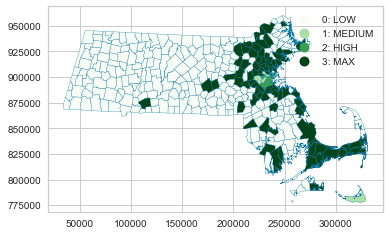

In [90]:
mass.plot(column='label_true', cmap='Greens', categorical=True, legend=True, edgecolor='b')

<AxesSubplot:>

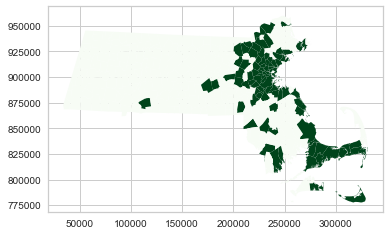

In [91]:
mass.plot(column='label_pred', cmap='Greens')

In [92]:
mass.to_file("forkartik.shp")

In [93]:
print(np.sum(mass['label_pred'] == mass['label_true'])/len(mass))

0.0


In [94]:
print(len(mass))

351


In [95]:
mass[mass['TOWN'] == 'WILLIAMSTOWN']

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,SUM_ACRES,SUM_SQUARE,POP2010,POPCH00_10,POPCH80_90,SHAPE_Leng,SHAPE_Area,geometry,label_true,label_pred
336,WILLIAMSTOWN,341,8383,8220,8424,204,T,4,25003,29986.518,46.854,7754,-670,-163,46832.408706,1.213511e+08,"POLYGON ((63790.653 945033.425, 63535.612 9414...",0: LOW,0


In [96]:
mass[mass['TOWN'] == 'HANCOCK']

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,SUM_ACRES,SUM_SQUARE,POP2010,POPCH00_10,POPCH80_90,SHAPE_Leng,SHAPE_Area,geometry,label_true,label_pred
200,HANCOCK,121,611,628,721,93,T,2,25003,22873.643,35.74,717,-4,17,57656.73538,9.256639e+07,"POLYGON ((55480.513 932687.675, 54438.712 9282...",0: LOW,0
